In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pb
from math import pi
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import math
from scipy.stats import norm

In [2]:
normal = norm(0,1)
t = -2
x = -1
size = 1000
w0_range = np.linspace(-2, 2, size)
w1_range = np.linspace(-2, 2, size)


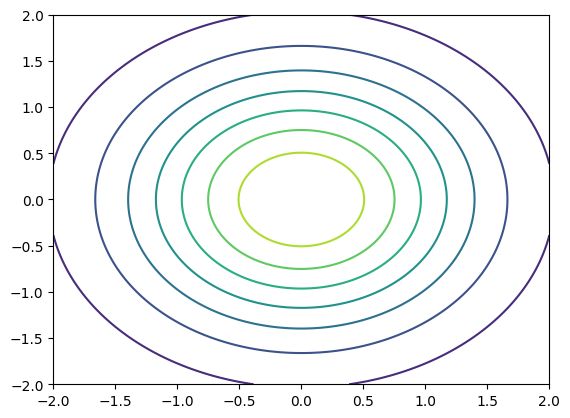

In [3]:

W0, W1 = np.meshgrid(w0_range, w1_range)

#print(np.shape(W0))
#print(W0)
#print(W1)

def likelihood(t, x, W0, W1):
    return np.exp(-0.5 *((t - W0*x - W1)/0.2)**2)/(math.sqrt(2*pi)*0.2)
    
    

prior = normal.pdf(W0) * normal.pdf(W1)
plt.figure()
plt.contour(W0, W1, prior)
##plt.scatter(normal.pdf(W0), normal.pdf(W1))

plt.show()



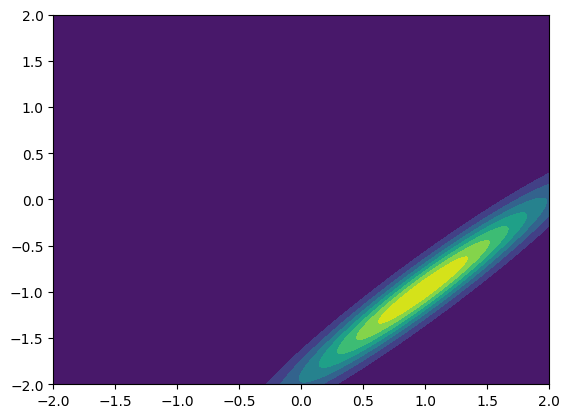

In [4]:
### task 1.2 ####
posterior = likelihood(t, x, W0, W1) * prior

plt.figure()
plt.contourf(W0, W1, posterior)

plt.show()

[1 1]
[[ 1.   -1.  ]
 [ 1.   -0.99]
 [ 1.   -0.98]
 [ 1.    1.  ]
 [ 1.    0.99]
 [ 1.    0.  ]
 [ 1.    0.75]]
2
[[-0.89173966 -0.49244483]
 [ 2.14024259 -1.54803317]
 [-2.63848303  0.77200013]
 [-0.85550106  4.02580583]
 [-3.0105264   3.10374272]]


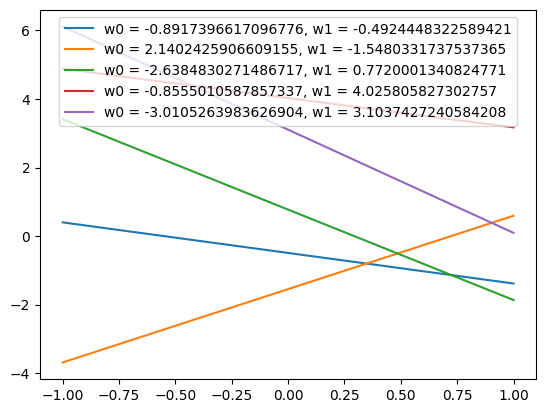

In [5]:
### task 1.3 ####
alpha = 1 / 0.2
beta = 0.2
data_t = [-2, -1.995, -1.99, -1, -1.005, -1.5, -1.125]
data_x = [-1, -0.99, -0.98, 1, 0.99, 0, 0.75]




print([1, -1]*np.transpose([1, -1]))

x_vec = data_x
t_vec = data_t
ones = np.ones(len(x_vec))
np.transpose([ones, x_vec]), [ones, x_vec]
#print(np.matmul([ones, x_vec],np.transpose([ones, x_vec])))

print(np.transpose([ones, x_vec]))
# print(np.matmul(np.transpose([ones, x_vec]), t_vec))

def create_samples(t_vec, x_vec, samples):
    ones = np.ones(len(x_vec))
    S = np.identity(2)*alpha + beta*np.matmul([ones, x_vec], np.transpose([ones, x_vec]))
    M = beta*S*np.matmul(np.transpose([ones, x_vec]), t_vec)
    return np.random.multivariate_normal(M, S, samples)

x_vec = data_x
t_vec = data_t
print(np.matmul(np.transpose([1, -1]), [1,-1]))
ones = np.ones(len(x_vec))
S = np.identity(2)*alpha + beta * np.matmul(np.transpose([1, -1]), [1,-1])
M = beta*np.matmul(S,np.transpose([1, -1]))*-2


#samples = create_samples(data_t, data_x, 5)
samples = np.random.multivariate_normal(M, S, 5)
print(samples)

w0 = []
w1 = []
for i in samples:
    w0.append(i[0])
    w1.append(i[1])


x_axis = np.linspace(-1,1, 200)

y = []
plt.figure()
for i in range(5): 
    y = w0[i]*x_axis + w1[i]
    plt.plot(x_axis, y, label= f"w0 = {w0[i]}, w1 = {w1[i]}")


plt.legend(loc='upper center')
plt.show()



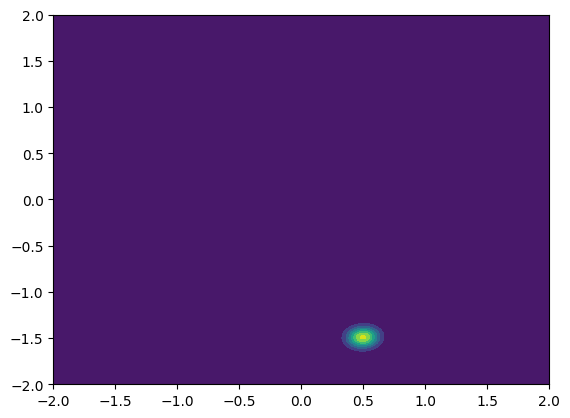

In [6]:
## task 1.4 ###
data_t = [-2, -1.995, -1.99, -1, -1.005, -1.5, -1.125]
data_x = [-1, -0.99, -0.98, 1, 0.99, 0, 0.75]


def calc_posterior(data_t, data_x, w0, w1, prior, length):
    posterior = likelihood(data_t[0], data_x[0], w0, w1) * prior
    for i in range(length):
        if i > 0:
            posterior *= likelihood(data_t[i], data_x[i], w0, w1)
    return posterior


new_posterior = calc_posterior(data_t, data_x, W0, W1, prior, 7)

plt.contourf(W0, W1, new_posterior)
plt.show()

Task 2

In [7]:
#####task 2.1 #####
sigma = 0.2
size = 1000
x0 = np.linspace(-1, 1, size)
x1 = np.linspace(-2, 2, size)

W = [0, 1.5, -0.8] 


w0_range = np.linspace(-2, 2, size)
w1_range = np.linspace(-2, 2, size)
w2_range = np.linspace(-2, 2,  size)

W0, W1, W2= np.meshgrid(w0_range, w1_range, w2_range)
normal = norm(0, sigma)

st_normal = norm(0, 1)
prior = st_normal.pdf(W0) * st_normal.pdf(W1) * st_normal.pdf(W2)

In [ ]:
def generate_data(x0, x1, W):
    w0 = W[0]
    w1 = W[1]
    w2 = W[2]
    return w0*x0 + w1*x1 + w2 #+ np.random.multivariate_normal([0, 0, 0], np.identity(3)*sigma, 1000)

data = generate_data(x0, x1, W)
training_size = 100
training_data = data[0:training_size]
training_x0 = np.linspace(-1, 1, training_size)
training_x1 = np.linspace(-2, 2, training_size)


ones = np.ones(training_size)
phi = np.transpose([ones, x0, x1])
phi_t = np.transpose([ones, data, data**2])
inv_phiTphi = np.linalg.inv(np.matmul(np.transpose(phi), phi))

print(np.shape(phi_t))
print(np.shape(inv_phiTphi))
W_ml = np.matmul(inv_phiTphi, np.transpose(phi_t))

print(np.shape(W_ml))


#def find_betaInv(input, w_max, n):
    #b = 1/n * sum(data )


LinAlgError: Singular matrix